<a href="https://colab.research.google.com/github/spierscaleb004/4410-HW/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal K: 13


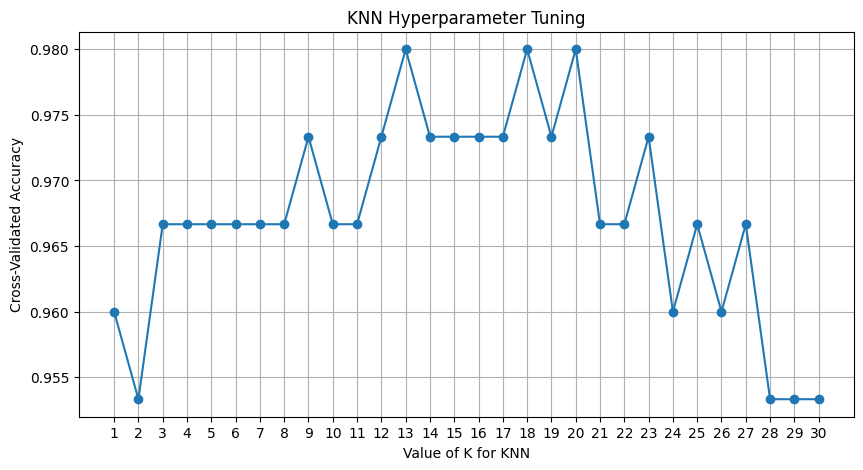

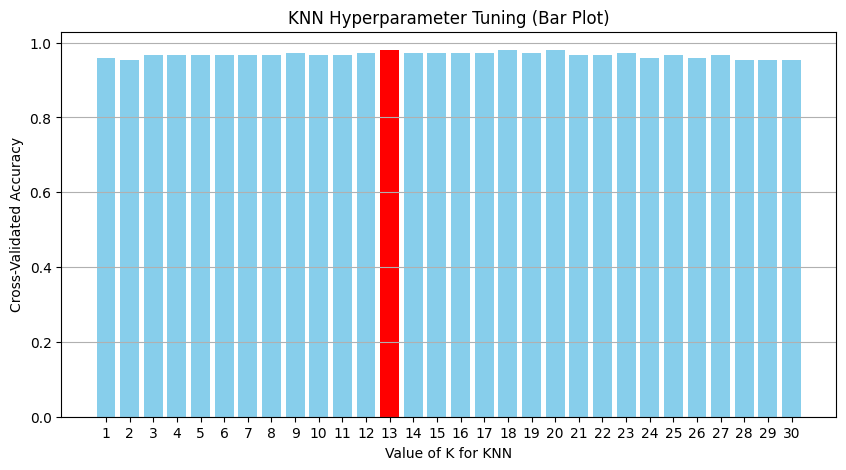

GridSearchCV best k: 13
GridSearchCV best score: 0.9800


In [4]:
# Import all the libraries we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV


# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target


# Set up cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=11)


# Loop
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    cv_scores.append(scores.mean())


# Find best K
best_k = k_range[np.argmax(cv_scores)]
print(f"Optimal K: {best_k}")


# Plot and show
plt.figure(figsize=(10,5))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('knn-1.jpg')
plt.show()

# Bar Graph
plt.figure(figsize=(10,5))
plt.bar(k_range, cv_scores, color='skyblue')
bars = plt.bar(best_k, cv_scores[best_k-1], color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning (Bar Plot)')
plt.xticks(k_range)
plt.grid(axis='y')
plt.savefig('knn2-1.jpg')
plt.show()

# GridSearchCV
param_grid = {'n_neighbors': range(1, 31)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid.fit(X, y)

print(f"GridSearchCV best k: {grid.best_params_['n_neighbors']}")
print(f"GridSearchCV best score: {grid.best_score_:.4f}")